### Decision-Tree Classifier

###### https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [6]:
data = pd.read_csv("car_evaluation.csv")

In [7]:
df = pd.DataFrame(data)

In [8]:
df.shape 

(1727, 7)

In [9]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
df.columns = col_names = [
    "buying",
    "maint",
    "doors",
    "persons",
    "lug_boot",
    "safety",
    "class",
]

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
860,high,low,5more,more,big,low,unacc
850,high,low,5more,4,med,high,acc
342,vhigh,low,2,more,small,med,unacc
79,vhigh,vhigh,4,more,big,high,unacc
91,vhigh,vhigh,5more,4,small,high,unacc


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
df.columns 

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [15]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

for i in columns:
    print(df[i].value_counts())
    print("-"*30)

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
------------------------------
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
------------------------------
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
------------------------------
persons
4       576
more    576
2       575
Name: count, dtype: int64
------------------------------
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
------------------------------
safety
med     576
high    576
low     575
Name: count, dtype: int64
------------------------------
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64
------------------------------


In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [18]:
x = df.drop("class",axis=1)
y = df["class"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42
)

In [20]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [21]:
label_le = LabelEncoder()

In [22]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]

In [23]:
for col in columns:
    X_train[col] = label_le.fit_transform(X_train[col])

In [24]:
for col in columns:
    X_test[col] = label_le.fit_transform(X_test[col])

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,2,2,3,1,0,0
585,0,0,1,2,2,2
1551,1,2,1,1,1,2
727,0,2,2,2,0,0
707,0,2,2,0,0,1


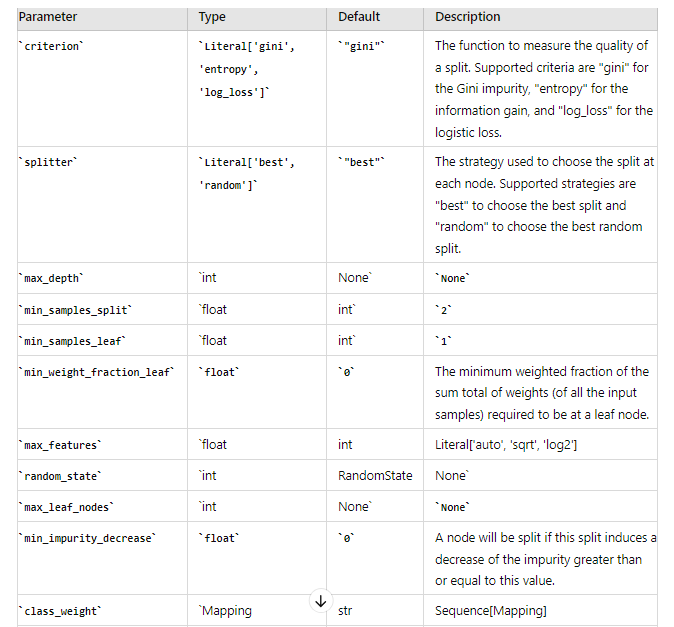

In [26]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=0)

In [27]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [28]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_train_gini = clf_gini.predict(X_train)

In [29]:
print(
    "Model accuracy score with criterion test index: {0:0.4f}".format(
        accuracy_score(y_test, y_pred_gini)
    )
)

print(
    "Model accuracy score with criterion train  index: {0:0.4f}".format(
        accuracy_score(y_train, y_pred_train_gini)
    )
)

Model accuracy score with criterion test index: 0.8921
Model accuracy score with criterion train  index: 0.8866


[Text(0.5223214285714286, 0.9285714285714286, 'x[3] <= 0.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.48660714285714285, 0.7857142857142857, 'gini = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]'),
 Text(0.5580357142857143, 0.7857142857142857, 'x[5] <= 0.5\ngini = 0.575\nsamples = 816\nvalue = [266, 52, 456, 42]'),
 Text(0.3482142857142857, 0.6428571428571429, 'x[0] <= 2.5\ngini = 0.629\nsamples = 264\nvalue = [141, 19, 62, 42]'),
 Text(0.19642857142857142, 0.5, 'x[0] <= 0.5\ngini = 0.618\nsamples = 196\nvalue = [109, 19, 26, 42]'),
 Text(0.10714285714285714, 0.35714285714285715, 'x[1] <= 2.5\ngini = 0.403\nsamples = 68\nvalue = [49, 0, 19, 0]'),
 Text(0.07142857142857142, 0.21428571428571427, 'x[2] <= 0.5\ngini = 0.109\nsamples = 52\nvalue = [49, 0, 3, 0]'),
 Text(0.03571428571428571, 0.07142857142857142, 'gini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.10714285714285714, 0.07142857142857142, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0, 0]'),
 Text(

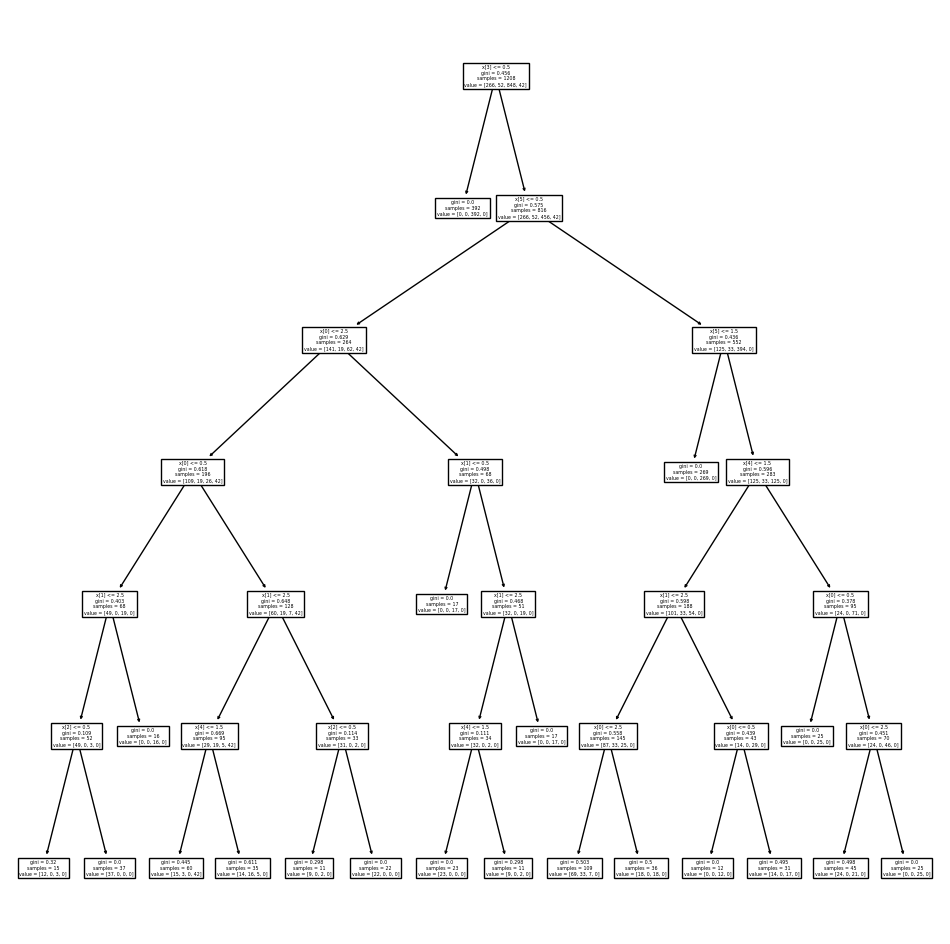

In [32]:
plt.figure(figsize=(12, 12))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [33]:
X_train.sample(2)

,buying,maint,doors,persons,lug_boot,safety
268,3,2,1,2,0,0
477,0,3,1,2,2,2


In [39]:
u1 = np.array([1, 2, 1, 2, 1, 0]).reshape(1, -1)
u1

array([[1, 2, 1, 2, 1, 0]])

In [40]:
print(clf_gini.predict(u1))

['vgood']


In [52]:
feature_importances = pd.Series(clf_gini.feature_importances_, index=x.columns)
feature_importances

buying      0.123634
maint       0.210406
doors       0.003519
persons     0.214131
lug_boot    0.095571
safety      0.352739
dtype: float64

In [65]:
fig = px.bar(
    feature_importances,
    x=feature_importances.values,
    y=feature_importances.index,
    labels="Feature Importance",
    height=500
)
fig.show()